In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binary-classification-with-a-bank-dataset-clone/sample_submission.csv
/kaggle/input/binary-classification-with-a-bank-dataset-clone/train.csv
/kaggle/input/binary-classification-with-a-bank-dataset-clone/test.csv


In [2]:
import pandas as pd

df = pd.read_csv(
    '/kaggle/input/binary-classification-with-a-bank-dataset-clone/train.csv'
)

df.head()


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [3]:
print(df.shape)

(750000, 18)


In [4]:

print(df.isnull())

           id    age    job  marital  education  default  balance  housing  \
0       False  False  False    False      False    False    False    False   
1       False  False  False    False      False    False    False    False   
2       False  False  False    False      False    False    False    False   
3       False  False  False    False      False    False    False    False   
4       False  False  False    False      False    False    False    False   
...       ...    ...    ...      ...        ...      ...      ...      ...   
749995  False  False  False    False      False    False    False    False   
749996  False  False  False    False      False    False    False    False   
749997  False  False  False    False      False    False    False    False   
749998  False  False  False    False      False    False    False    False   
749999  False  False  False    False      False    False    False    False   

         loan  contact    day  month  duration  campaign  pdays

In [5]:
df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
list(df.columns)


['id',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [7]:
import sklearn 
import matplotlib as plt

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df[['id',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']]=df[['id',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']].apply(LabelEncoder().fit_transform)

In [10]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,24,9,1,1,0,1301,0,0,0,24,1,115,2,0,0,3,0
1,1,20,1,1,1,0,1808,0,0,2,17,6,183,0,0,0,3,0
2,2,18,1,1,1,0,1896,1,0,2,13,8,109,1,0,0,3,0
3,3,9,8,2,1,0,1328,1,0,2,27,8,8,1,0,0,3,0
4,4,8,9,1,1,0,2183,1,0,0,2,3,900,0,0,0,3,1


In [11]:
import seaborn as sns

[0 1] [659512  90488]


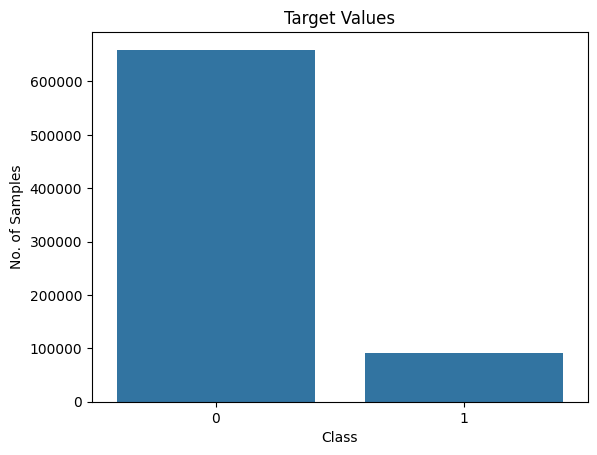

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

(unique,count)=np.unique(df['y'],return_counts=True)
print(unique,count)

sns.barplot(x=unique, y=count)
plt.xlabel("Class")
plt.ylabel("No. of Samples")
plt.title("Target Values")
plt.show()


In [13]:
X = df.drop('y', axis=1)
y = df['y']


In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import ( accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve, confusion_matrix, mean_squared_error )

import matplotlib.pyplot as plt
import seaborn as sns

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Support Vector Machine': LinearSVC()
}



===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    131902
           1       0.65      0.41      0.51     18098

    accuracy                           0.90    150000
   macro avg       0.79      0.69      0.73    150000
weighted avg       0.89      0.90      0.89    150000

ROC AUC: 0.9223092168715613


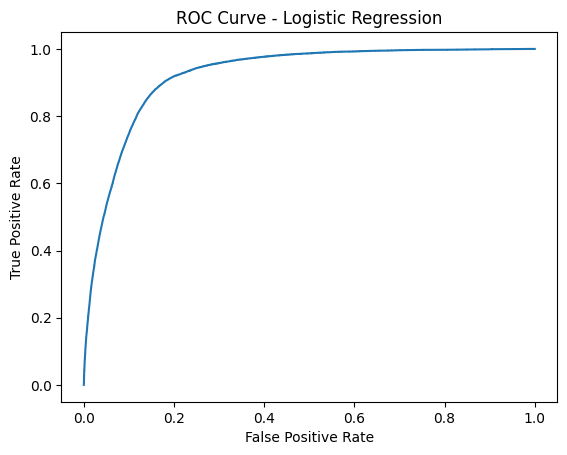

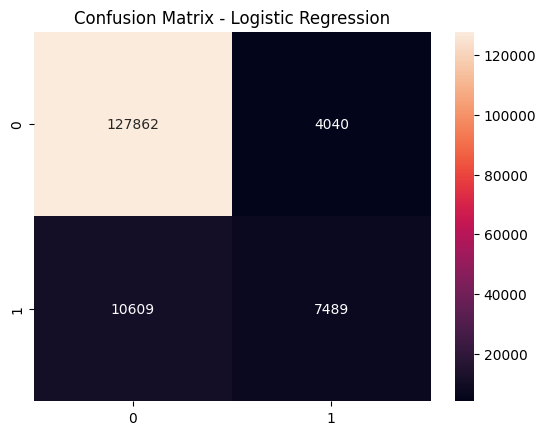


===== Decision Tree =====
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    131902
           1       0.61      0.62      0.61     18098

    accuracy                           0.91    150000
   macro avg       0.78      0.78      0.78    150000
weighted avg       0.91      0.91      0.91    150000

ROC AUC: 0.7816458734129624


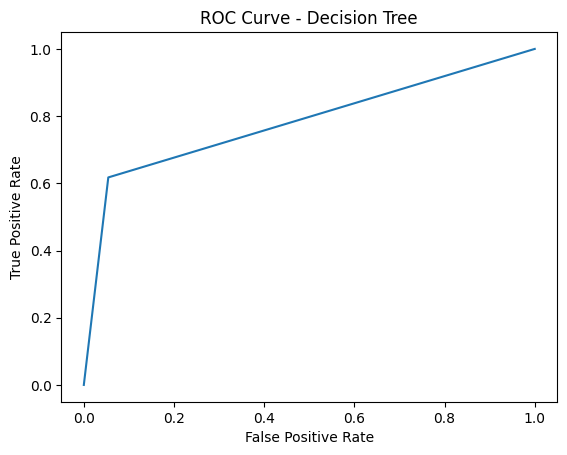

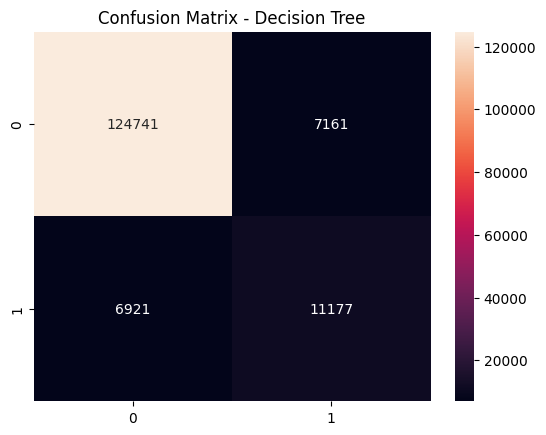


===== Gradient Boosting =====
              precision    recall  f1-score   support

           0       0.94      0.97      0.96    131902
           1       0.74      0.58      0.65     18098

    accuracy                           0.92    150000
   macro avg       0.84      0.78      0.80    150000
weighted avg       0.92      0.92      0.92    150000

ROC AUC: 0.9550363899917934


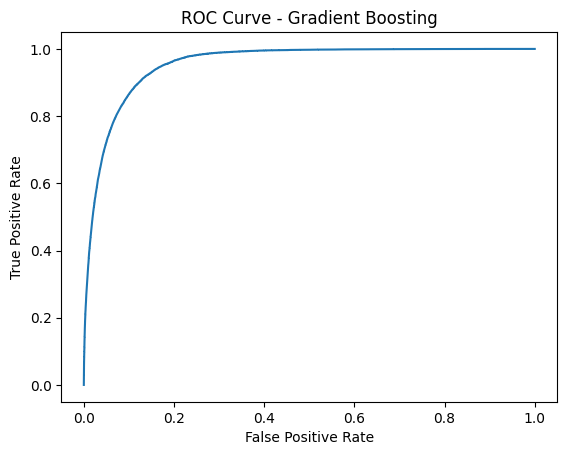

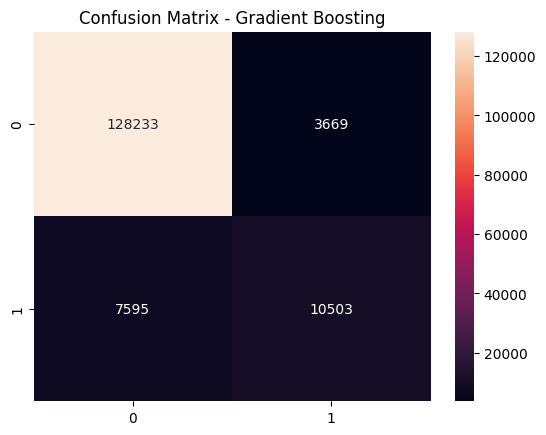


===== Random Forest =====
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    131902
           1       0.75      0.64      0.69     18098

    accuracy                           0.93    150000
   macro avg       0.85      0.81      0.83    150000
weighted avg       0.93      0.93      0.93    150000

ROC AUC: 0.9624033131761849


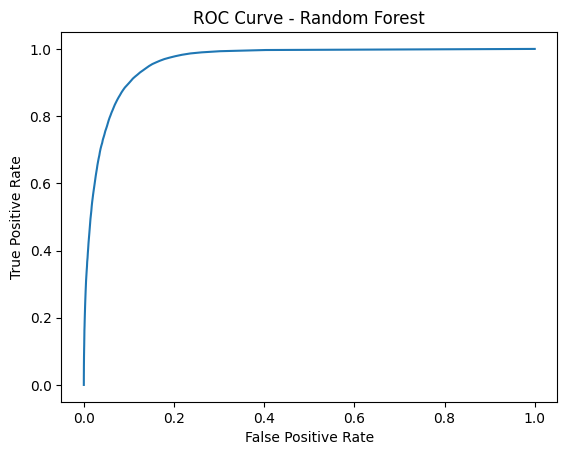

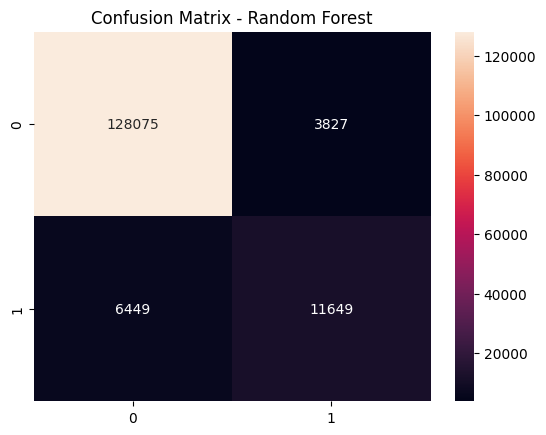


===== XGBoost =====
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    131902
           1       0.76      0.65      0.70     18098

    accuracy                           0.93    150000
   macro avg       0.86      0.81      0.83    150000
weighted avg       0.93      0.93      0.93    150000

ROC AUC: 0.9659002434704907


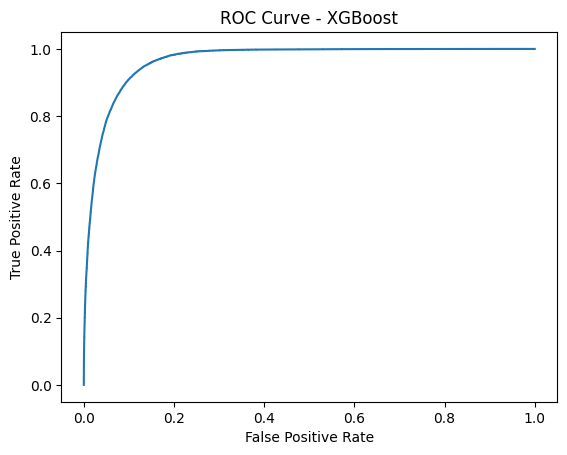

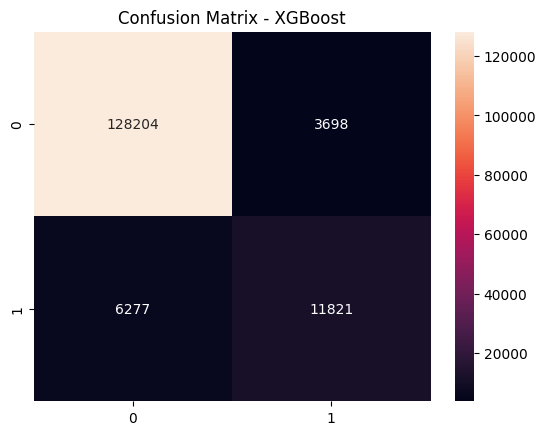


===== Support Vector Machine =====
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    131902
           1       0.67      0.37      0.48     18098

    accuracy                           0.90    150000
   macro avg       0.79      0.67      0.71    150000
weighted avg       0.89      0.90      0.89    150000

ROC AUC: 0.9234071643779362


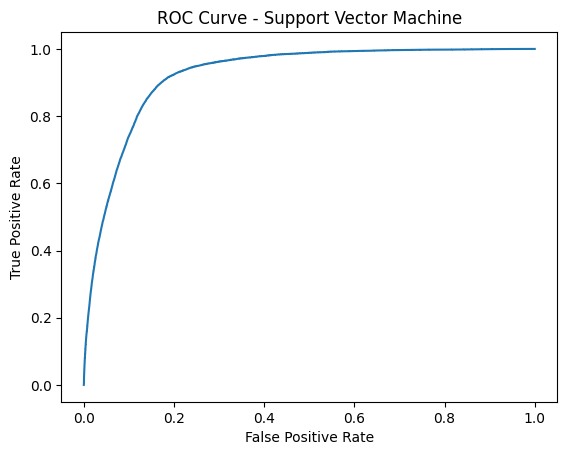

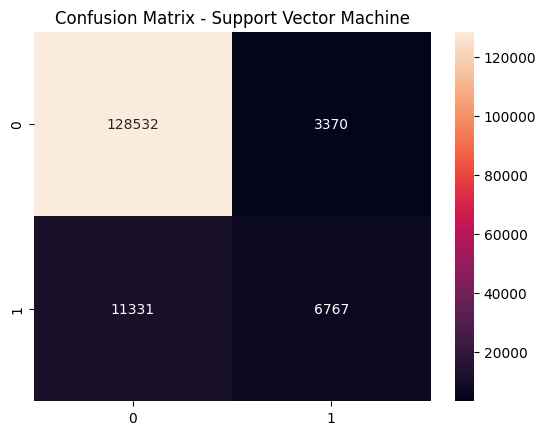

In [23]:
accuracy = {}
precision = {}
recall = {}

for key, model in models.items():

    # Use scaled data ONLY for these models
    if key in ['Logistic Regression', 'Support Vector Machine', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Metrics
    accuracy[key] = accuracy_score(y_test, y_pred)
    precision[key] = precision_score(y_test, y_pred)
    recall[key] = recall_score(y_test, y_pred)

    # ROC-AUC handling
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_scaled if key in ['Logistic Regression','KNN'] else X_test)[:,1]
    else:
        y_scores = model.decision_function(X_test_scaled)

    auc = roc_auc_score(y_test, y_scores)

    print(f"\n===== {key} =====")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", auc)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {key}')
    plt.show()

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f'Confusion Matrix - {key}')
    plt.show()


In [24]:
import pandas as pd

In [26]:
df_model=pd.DataFrame(index=models.keys(),columns=['accuracy','precision','recall'])
df_model['accuracy']=accuracy.values()
df_model['precision']=precision.values()
df_model['recall']=recall.values()

df_model

,accuracy,precision,recall
Logistic Regression,0.902340,0.649579,0.413803
Decision Tree,0.906120,0.609499,0.617582
Gradient Boosting,0.924907,0.741109,0.580340
Random Forest,0.931493,0.752714,0.643662
XGBoost,0.933500,0.761711,0.653166
Support Vector Machine,0.901993,0.667555,0.373909


In [34]:
import os
print(os.listdir('/kaggle/input/formulatedtest/'))

['formulatedtest (1).csv']


In [35]:
import pandas as pd

test_df = pd.read_csv('/kaggle/input/formulatedtest/formulatedtest (1).csv')

In [37]:
test_df.shape

(250000, 17)

In [38]:
test_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,14,1,1,1,0,2450,1,0,2,20,8,221,0,0,0,3
1,1,26,4,1,2,0,1080,1,0,0,2,0,582,1,0,0,3
2,2,18,6,1,0,0,1103,1,1,0,12,8,108,1,0,0,3
3,3,40,1,1,1,0,121,1,1,2,28,8,122,0,0,0,3
4,4,10,9,2,1,0,2966,1,0,0,21,5,178,0,0,0,3


In [39]:
X_test_final = test_df.drop('id', axis=1)


In [41]:
# Drop id from train
X_train = X_train.drop(columns=['id'], errors='ignore')

# Drop id from test
X_test_final = X_test_final.drop(columns=['id'], errors='ignore')

# Now align columns
X_test_final = X_test_final[X_train.columns]


In [44]:
X_test_final.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,14,1,1,1,0,2450,1,0,2,20,8,221,0,0,0,3
1,26,4,1,2,0,1080,1,0,0,2,0,582,1,0,0,3
2,18,6,1,0,0,1103,1,1,0,12,8,108,1,0,0,3
3,40,1,1,1,0,121,1,1,2,28,8,122,0,0,0,3
4,10,9,2,1,0,2966,1,0,0,21,5,178,0,0,0,3


In [45]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
385296,35,6,1,1,0,1299,1,0,0,20,9,51,0,0,0,3
696342,22,2,1,0,0,2053,0,0,0,19,9,66,0,0,0,3
350451,35,0,1,1,0,2766,1,1,0,19,9,507,1,0,0,3
545334,6,9,2,1,0,2149,1,0,0,15,0,1197,0,0,0,3
138700,31,0,1,1,0,3328,0,0,0,29,0,1651,0,0,0,3


In [46]:
X_test_final = X_test_final[X_train.columns]


In [48]:
final_model = models['XGBoost']


In [50]:
# Drop id if present
if 'id' in X_train.columns:
    X_train = X_train.drop(columns=['id'])

if 'id' in X_test_final.columns:
    X_test_final = X_test_final.drop(columns=['id'])


In [51]:
final_model = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False
)

final_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:33:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [52]:
test_predictions = final_model.predict(X_test_final)


In [53]:
test_predictions[:10]


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [54]:
import numpy as np
np.unique(test_predictions, return_counts=True)


(array([0, 1]), array([223869,  26131]))

In [55]:
submission = pd.DataFrame({
    'id': test_df['id'],
    'target': test_predictions
})

submission.to_csv('submission.csv', index=False)


In [56]:
sample_sub = pd.read_csv(
    '/kaggle/input/binary-classification-with-a-bank-dataset-clone/sample_submission.csv'
)

sample_sub.head()


,id,y
0,750000,0.5
1,750001,0.5
2,750002,0.5
3,750003,0.5
4,750004,0.5


In [74]:
sample_sub['target'] = test_predictions


In [75]:
sample_sub.to_csv('submission.csv', index=False)


In [76]:
sample_sub.shape


(250000, 3)

In [77]:
test_predictions.shape


(250000,)

In [78]:
sample_sub.columns




Index(['id', 'y', 'target'], dtype='object')

In [79]:
import numpy as np
np.unique(test_predictions)


array([0, 1])

In [80]:
sample_sub = sample_sub[['id', 'target']]


In [81]:
sample_sub.columns


Index(['id', 'target'], dtype='object')

In [82]:
len(test_predictions), len(sample_sub)



(250000, 250000)

In [84]:
sample_sub = sample_sub.copy()
sample_sub['target'] = test_predictions.astype(int)


In [86]:
sample_sub.head()
sample_sub.dtypes
sample_sub.shape


(250000, 2)

In [89]:
sample_sub.head(60)


,id,target
0,750000,0
1,750001,0
2,750002,0
3,750003,0
4,750004,0
5,750005,0
6,750006,0
7,750007,1
8,750008,0
9,750009,1


In [90]:
sample_sub.dtypes


id        int64
target    int64
dtype: object

In [91]:
sample_sub.to_csv("Finalsubmission.csv", index=False)
